<a href="https://colab.research.google.com/github/santiagoruiz-udea/News_classification/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string
import nltk
import re

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# Reading the dataset

In [ ]:
news = fetch_20newsgroups(subset="all", remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(news.data, columns=['text'])
df["labels"] = [i for i in news.target]
df["text"] = [re.sub('\s+', ' ', sent) for sent in df["text"]]
df.head()

,text,labels
0,I am sure some bashers of Pens fans are prett...,10
1,My brother is in the market for a high-perform...,3
2,Finally you said what you dream about. Medite...,17
3,Think! It's the SCSI card doing the DMA trans...,3
4,1) I have an old Jasmine drive which I cannot ...,4


# Punctuation removal

Para tener un buen resultado en el modelo que se quiere construir, es necesario eliminar los signos de puntuación. En la librería `string` existe una función la que contiene todos los signos de puntuación que existen en el lenguaje, estos son: **!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~**

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_msg']= df['text'].apply(lambda x:remove_punctuation(x))
df.head()

,text,labels,clean_msg
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...


# Lowering the text

In [ ]:
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

,text,labels,clean_msg,msg_lower
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...,i am sure some bashers of pens fans are prett...
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...,my brother is in the market for a highperforma...
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...,finally you said what you dream about mediter...
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...,think its the scsi card doing the dma transfe...
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...,1 i have an old jasmine drive which i cannot u...


# Tokenization

Tokenizar un texto consiste en dividir el texto en las unidades que lo conforman, entendiendo por unidad el elemento más sencillo con significado propio para el análisis en cuestión, en este caso, las palabras.

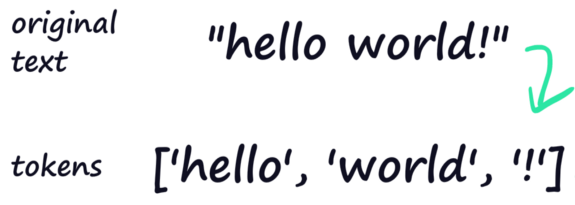

In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('\W',text)
    return tokens

#applying function to the column
df['msg_tokenied']= df['msg_lower'].apply(lambda x: tokenization(x))
df.head()

,text,labels,clean_msg,msg_lower,msg_tokenied
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...,i am sure some bashers of pens fans are prett...,"[, i, am, sure, some, bashers, of, pens, fans,..."
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...,my brother is in the market for a highperforma...,"[my, brother, is, in, the, market, for, a, hig..."
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...,finally you said what you dream about mediter...,"[, finally, you, said, what, you, dream, about..."
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...,think its the scsi card doing the dma transfe...,"[, think, its, the, scsi, card, doing, the, dm..."
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...,1 i have an old jasmine drive which i cannot u...,"[1, i, have, an, old, jasmine, drive, which, i..."


# Stop word removal

Por lo general los términos más frecuentes en todos los articulos son: preposiciones, pronombres, articulos advervios, hasta algunos verbos, en general, palabras que no aportan información relevante sobre el texto, es decir, palabras que no tienen un significado por sí solas. Ha estas palabras se les conoce como stopwords.

En este caso se usa los stopword que contiene la libreria `nltk` que son las siguentes:  `['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves','you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers','herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here','there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]`

In [ ]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df.head()

,text,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...,i am sure some bashers of pens fans are prett...,"[, i, am, sure, some, bashers, of, pens, fans,...","[, sure, bashers, pens, fans, pretty, confused..."
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...,my brother is in the market for a highperforma...,"[my, brother, is, in, the, market, for, a, hig...","[brother, market, highperformance, video, card..."
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...,finally you said what you dream about mediter...,"[, finally, you, said, what, you, dream, about...","[, finally, said, dream, mediterranean, new, a..."
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...,think its the scsi card doing the dma transfe...,"[, think, its, the, scsi, card, doing, the, dm...","[, think, scsi, card, dma, transfers, disks, s..."
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...,1 i have an old jasmine drive which i cannot u...,"[1, i, have, an, old, jasmine, drive, which, i...","[1, old, jasmine, drive, cannot, use, new, sys..."


# Stemming

El stemming es un método para reducir todas las formas flexionadas de palabras a su **raíz** o **tallo** (stem, en inglés), cuando estas comparten una misma raíz. Por ejemplo, las palabras niños, niña y niñez tienen todas la misma raíz: **niñ**

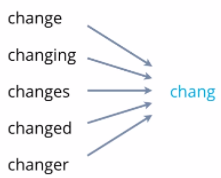

In [ ]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df['msg_stemmed']=df['no_stopwords'].apply(lambda x: stemming(x))
df.head()

,text,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...,i am sure some bashers of pens fans are prett...,"[, i, am, sure, some, bashers, of, pens, fans,...","[, sure, bashers, pens, fans, pretty, confused...","[, sure, basher, pen, fan, pretti, confus, lac..."
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...,my brother is in the market for a highperforma...,"[my, brother, is, in, the, market, for, a, hig...","[brother, market, highperformance, video, card...","[brother, market, highperform, video, card, su..."
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...,finally you said what you dream about mediter...,"[, finally, you, said, what, you, dream, about...","[, finally, said, dream, mediterranean, new, a...","[, final, said, dream, mediterranean, new, are..."
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...,think its the scsi card doing the dma transfe...,"[, think, its, the, scsi, card, doing, the, dm...","[, think, scsi, card, dma, transfers, disks, s...","[, think, scsi, card, dma, transfer, disk, scs..."
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...,1 i have an old jasmine drive which i cannot u...,"[1, i, have, an, old, jasmine, drive, which, i...","[1, old, jasmine, drive, cannot, use, new, sys...","[1, old, jasmin, drive, cannot, use, new, syst..."


# Lemmatization

La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente.La lematización, a diferencia del stemming cada lema es una palabra que existe en el vocabulario del lenguaje correspondiente. Por ejemplo, las palabras niños, niña y niñez tienen todas la misma raíz: **niño**

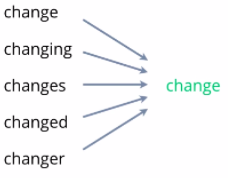

In [ ]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['msg_lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))
df.head()

,text,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,I am sure some bashers of Pens fans are prett...,10,I am sure some bashers of Pens fans are prett...,i am sure some bashers of pens fans are prett...,"[, i, am, sure, some, bashers, of, pens, fans,...","[, sure, bashers, pens, fans, pretty, confused...","[, sure, basher, pen, fan, pretti, confus, lac...","[, sure, bashers, pen, fan, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,My brother is in the market for a highperforma...,my brother is in the market for a highperforma...,"[my, brother, is, in, the, market, for, a, hig...","[brother, market, highperformance, video, card...","[brother, market, highperform, video, card, su...","[brother, market, highperformance, video, card..."
2,Finally you said what you dream about. Medite...,17,Finally you said what you dream about Mediter...,finally you said what you dream about mediter...,"[, finally, you, said, what, you, dream, about...","[, finally, said, dream, mediterranean, new, a...","[, final, said, dream, mediterranean, new, are...","[, finally, said, dream, mediterranean, new, a..."
3,Think! It's the SCSI card doing the DMA trans...,3,Think Its the SCSI card doing the DMA transfe...,think its the scsi card doing the dma transfe...,"[, think, its, the, scsi, card, doing, the, dm...","[, think, scsi, card, dma, transfers, disks, s...","[, think, scsi, card, dma, transfer, disk, scs...","[, think, scsi, card, dma, transfer, disk, scs..."
4,1) I have an old Jasmine drive which I cannot ...,4,1 I have an old Jasmine drive which I cannot u...,1 i have an old jasmine drive which i cannot u...,"[1, i, have, an, old, jasmine, drive, which, i...","[1, old, jasmine, drive, cannot, use, new, sys...","[1, old, jasmin, drive, cannot, use, new, syst...","[1, old, jasmine, drive, cannot, use, new, sys..."


# ContVectorize

Es un método para convertir texto en datos numéricos. Se utiliza para transformar un texto dado en un vector en función de la frecuencia (recuento) de cada palabra que aparece en todo el texto.​

In [ ]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df["msg_lower"][0:50])
count_array = count_matrix.toarray()

coundf = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
coundf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,010101,07748,10,100,1006,1018,1020ms,1021,1036,1040,1046,1049,1052,1062,1069,108,1099,10th,11,1103,1107,1121,1122,1126,1130,1170,1174,1190,1192,12,120,1200th,1201,120kvolt,1210,1212,1219,1221,1229,123,...,workshop,world,worse,would,wouldnt,wound,wow,wpg,wpgbuf,wpghfdvan,wpgnyrsjnyi,wpgwshbosstlchi,write,writer,writeup,writing,wrong,wrote,wshminnyr,wshmtlvan,wshnyrlabostor,wshstlnj,wynn,xfree86,xfree86physicssuozau,yarker,yeah,year,years,yellow,yesterday,yet,you,your,youre,yvan,yzerman,zenos,zero,zezel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,3,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# TfidfVectorizer

Método estadístico para calcular la importancia de una palabra en todo el corpus en función del número de veces que la palabra aparece en el texto y la frecuencia de los documentos que aparecen en todo el corpus.​

In [ ]:
vec=TfidfVectorizer()
tfidf_matrix = vec.fit_transform(df["msg_lower"][0:50])
tfidf_array = tfidf_matrix.toarray()

tfidfdf = pd.DataFrame(data=tfidf_array,columns = vec.get_feature_names())
tfidfdf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,010101,07748,10,100,1006,1018,1020ms,1021,1036,1040,1046,1049,1052,1062,1069,108,1099,10th,11,1103,1107,1121,1122,1126,1130,1170,1174,1190,1192,12,120,1200th,1201,120kvolt,1210,1212,1219,1221,1229,123,...,workshop,world,worse,would,wouldnt,wound,wow,wpg,wpgbuf,wpghfdvan,wpgnyrsjnyi,wpgwshbosstlchi,write,writer,writeup,writing,wrong,wrote,wshminnyr,wshmtlvan,wshnyrlabostor,wshstlnj,wynn,xfree86,xfree86physicssuozau,yarker,yeah,year,years,yellow,yesterday,yet,you,your,youre,yvan,yzerman,zenos,zero,zezel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.080214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.035845,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.065325,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048929,0.0,0.0,0.0,0.293604,0.114384,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.070425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.028460,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
